In [2]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import exposure
from skimage.exposure import cumulative_distribution


In [4]:
imgCv = cv2.imread("pic.jpg")
imgPlt = plt.imread("pic.jpg")

**3.1 : Image Pixel Adjustment (gamma)**

In [5]:
im = imgCv
fps = 10

a = 1.0
b = 0

Frame = []

for i in range(30):
    gamma = 0.1+(0.1*i)
    im_test = np.zeros((538,1024,3), dtype='uint8')
    im_test[:,:] = (a*(((im[:,:]/255)**gamma)+b))*255
    Frame.append(im_test)

file_path = 'gamma_mr_van.mp4'
fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
writer = cv2.VideoWriter(file_path, fourcc, fps, (1024, 538))

for frame in Frame:
    writer.write(frame)
    
for frame in reversed(Frame):
    writer.write(frame)

writer.release()
print("Finished")


Finished


**3.2 Image Histogram Equalization**

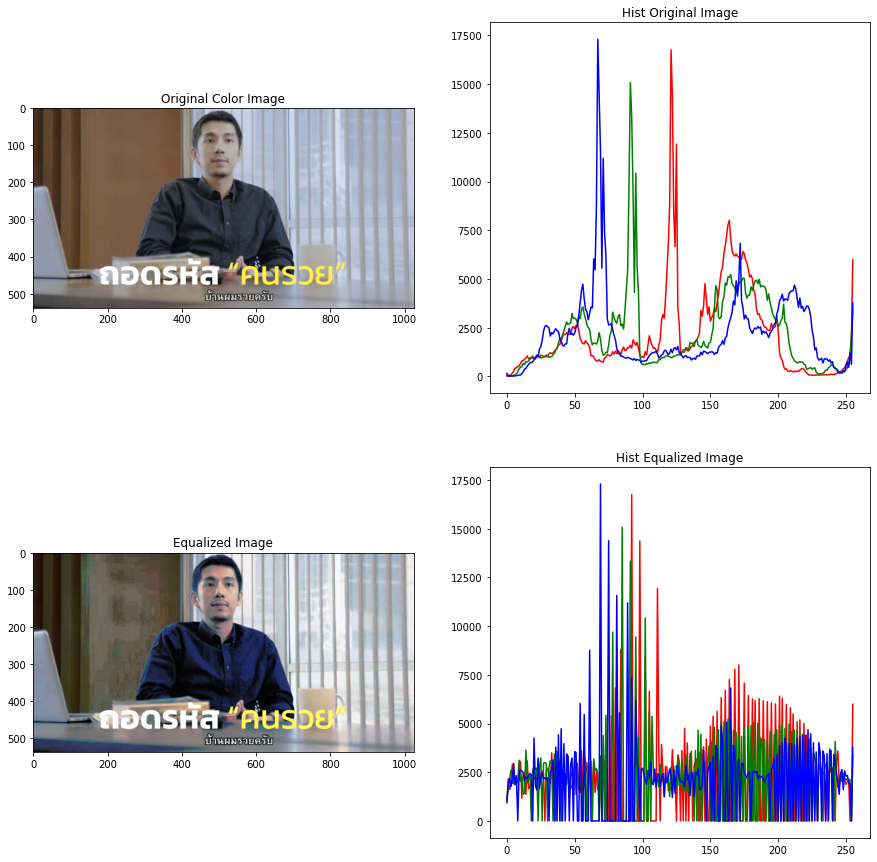

In [6]:
img_ori = cv2.cvtColor(imgCv, cv2.COLOR_BGR2RGB)

img_eqa = cv2.cvtColor(imgCv, cv2.COLOR_BGR2RGB)

img_eqa[:,:,0] = cv2.equalizeHist(img_ori[:,:,0])
img_eqa[:,:,1] = cv2.equalizeHist(img_ori[:,:,1])
img_eqa[:,:,2] = cv2.equalizeHist(img_ori[:,:,2])

f, axarr = plt.subplots(2,2)

f.set_figheight(15)
f.set_figwidth(15)
f.set_facecolor("white")

axarr[0,0].title.set_text("Original Color Image")
axarr[0,0].imshow(img_ori)

histr_r = cv2.calcHist([img_ori],[0],None,[256],[0,256])
histr_g = cv2.calcHist([img_ori],[1],None,[256],[0,256])
histr_b = cv2.calcHist([img_ori],[2],None,[256],[0,256])

axarr[0,1].title.set_text("Hist Original Image")
axarr[0,1].plot(histr_r, color = 'r')
axarr[0,1].plot(histr_g, color = 'g')
axarr[0,1].plot(histr_b, color = 'b')

axarr[1,0].title.set_text("Equalized Image")
axarr[1,0].imshow(img_eqa)

histr_eqa_r = cv2.calcHist([img_eqa],[0],None,[256],[0,256])
histr_eqa_g = cv2.calcHist([img_eqa],[1],None,[256],[0,256])
histr_eqa_b = cv2.calcHist([img_eqa],[2],None,[256],[0,256])

axarr[1,1].title.set_text("Hist Equalized Image")
axarr[1,1].plot(histr_eqa_r, color = 'r')
axarr[1,1].plot(histr_eqa_g, color = 'g')
axarr[1,1].plot(histr_eqa_b, color = 'b')

plt.savefig('act3_2.png', facecolor=f.get_facecolor(), transparent=True)

In [ ]:
def cdf(im):
    c, b = cumulative_distribution(im)

    for i in range(b[0]):
        c = np.insert(c, 0, 0)
    for i in range(b[-1]+1, 256):
        c = np.append(c, 1)
    return c

def hist_matching(c, c_t, im):
    b = np.interp(c, c_t, np.arange(256))
    pix_repl = {i:b[i] for i in range(256)}
    mp = np.arange(0, 256)
    for (k, v) in pix_repl.items():
        mp[k] = v
    s = im.shape
    im = np.reshape(mp[im.ravel()], im.shape)
    im = np.reshape(im, s)
    return im

**3.3 Image Histogram Equalization**

In [8]:
imgMatch = cv2.imread("pic_match.jpg")

img_ori = cv2.cvtColor(imgCv, cv2.COLOR_BGR2RGB)
img_mat = cv2.cvtColor(imgCv, cv2.COLOR_BGR2RGB)

im_result = cv.cvtColor(src, cv.COLOR_BGR2RGB)

cdf_im1_R = cdf(img[:,:,0])
cdf_im2_R = cdf(img2[:,:,0])

cdf_im1_G = cdf(img[:,:,1])
cdf_im2_G = cdf(img2[:,:,1])

cdf_im1_B = cdf(img[:,:,2])
cdf_im2_B = cdf(img2[:,:,2])

NameError: name 'cv' is not defined